/kaggle/input/2dising/database.json


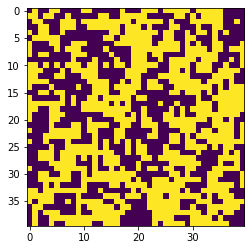

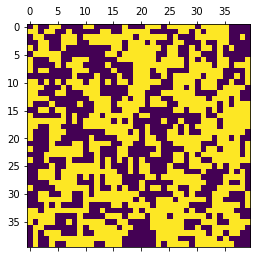

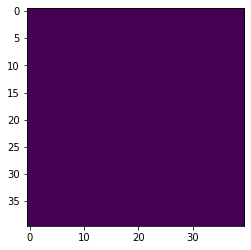

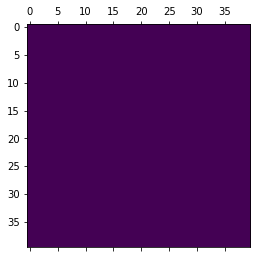

Abkühlen, Durchgang: 1, Param: 0.0
Abkühlen, Durchgang: 1, Param: 0.1111111111111111
Abkühlen, Durchgang: 1, Param: 0.2222222222222222
Abkühlen, Durchgang: 1, Param: 0.3333333333333333
Abkühlen, Durchgang: 1, Param: 0.4444444444444444
Abkühlen, Durchgang: 1, Param: 0.5555555555555556
Abkühlen, Durchgang: 1, Param: 0.6666666666666666
Abkühlen, Durchgang: 1, Param: 0.7777777777777777
Abkühlen, Durchgang: 1, Param: 0.8888888888888888
Abkühlen, Durchgang: 1, Param: 1.0


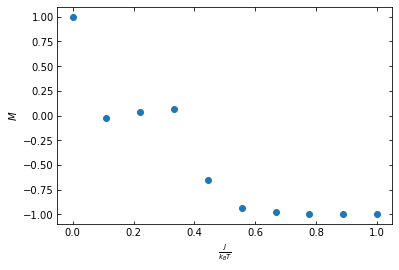

Aufwärmen, Durchgang: 1, Param: 1.0
Aufwärmen, Durchgang: 1, Param: 0.8888888888888888
Aufwärmen, Durchgang: 1, Param: 0.7777777777777778
Aufwärmen, Durchgang: 1, Param: 0.6666666666666667
Aufwärmen, Durchgang: 1, Param: 0.5555555555555556
Aufwärmen, Durchgang: 1, Param: 0.4444444444444444
Aufwärmen, Durchgang: 1, Param: 0.33333333333333337
Aufwärmen, Durchgang: 1, Param: 0.22222222222222232
Aufwärmen, Durchgang: 1, Param: 0.11111111111111116
Aufwärmen, Durchgang: 1, Param: 0.0


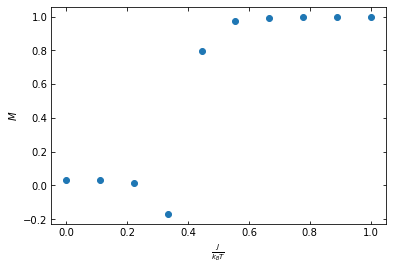

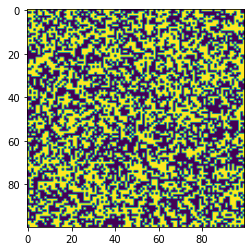

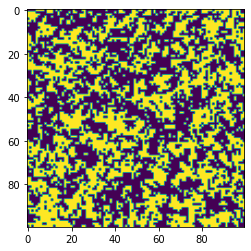

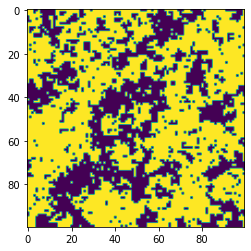

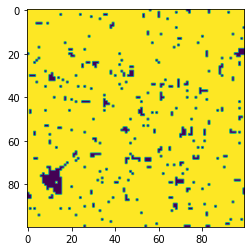

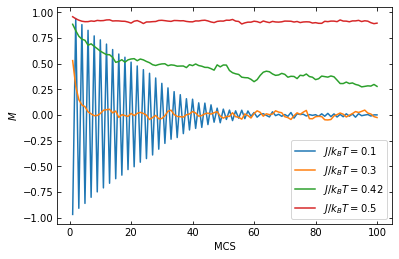

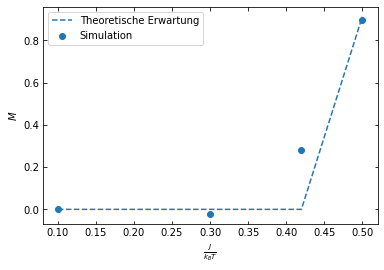

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import json

# Überprüfe, welche Dateien geladen wurden
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


spins = None
data = []
plots = []
plot = None

def reset(dim):
    global spins
    spins = np.ones((dim, dim), dtype=int)

def monte_carlo_simulation(dim, param, steps = 100, animation_ = False, animation_title = 'animation.mp4'): 
    global spins
    global plots
    global data
    M = [] 
    if animation_:
        # Weise bei Animation eine neue Figure zu
        plt.show()
        fig = plt.gcf()
        data =  [[plt.imshow(spins, animated = True)]]
    # Eigentliche Monte-Carlo-Simulation
    for s in range(steps):
        for i in range(dim):
            for j in range(dim):
                # Berechne dH unter der Annahme, dass i,j probeweise geflippt 
                d_H = - 2 * (spins[i][j]) * (spins[(i + 1) % dim][j] + spins[(i - 1) % dim][j] + spins[i][(j + 1) % dim] + spins[i][(j - 1) % dim])  
                # Stelle fest, ob Spin gedreht bleiben soll
                flipped = np.random.random() < min(1, np.exp(d_H * param))
                if flipped:
                    spins[i][j] *= (-1)
        M.append(sum(sum(spins)) / (dim ** 2))
        if animation_:
            im = plt.imshow(spins, animated=True)
            data.append([im])
    if animation_:
        ani = animation.ArtistAnimation(fig, data, interval=100, blit=False)
        ani.save(animation_title)
    return M
    
def cold_start():
    global plots
    global plot
    reset(40)
    monte_carlo_simulation(40,.2, animation_ = True, animation_title = 'monte_carlo_02.mp4')
    plt.matshow(spins)
    plt.savefig('cold_start_02.png', dpi = 1000)
    plt.show()
    monte_carlo_simulation(40,.9, animation_ = True, animation_title = 'monte_carlo_09.mp4')
    plt.matshow(spins)
    plt.savefig('cold_start_09.png', dpi = 1000)
    plt.show()

points = pd.DataFrame()
def write_database():
    # Datenbank schreiben
    result = points.to_json(orient = 'records')
    with open('database_new.json', 'w') as f:
        f.write(result)

def cool_down(save=False, param_steps = 100, rounds = 10):
    global points
    plt.xlabel(r'$\frac{J}{k_BT}$')
    plt.ylabel('$M$')
    plt.tick_params('x', direction='in', top=True)
    plt.tick_params('y', direction='in', right=True)
    for i in range(rounds):
        reset(40)
        data_m = []
        for param in np.linspace(0, 1, param_steps):
            # Mache eine Simulation mit 100 MCS
            m = monte_carlo_simulation(40,param)[-1]
            data_m.append(m)
            if save:
                point = {'param': param, 'spins': list(spins.flatten()), 'M': m}
                points = points.append(point, ignore_index=True)
            print(f"Abkühlen, Durchgang: {i+1}, Param: {param}")
        plt.scatter(np.linspace(0, 1, param_steps), data_m)
    plt.savefig('abkühlen.png', dpi=1000)
    plt.show()


def warm_up(save=False, param_steps = 100, rounds = 10):
    global points
    plt.xlabel(r'$\frac{J}{k_BT}$')
    plt.ylabel('$M$')
    plt.tick_params('x', direction='in', top=True)
    plt.tick_params('y', direction='in', right=True)
    for i in range(rounds):
        reset(40)
        data_m = []
        for param in np.linspace(1, 0, param_steps):
            # Mache eine Simulation mit 100 MCS
            m = monte_carlo_simulation(40,param)[-1]
            data_m.append(m)
            if save:
                point = {'param': param, 'spins': list(spins.flatten()), 'M': m}
                points = points.append(point, ignore_index=True)
            print(f"Aufwärmen, Durchgang: {i+1}, Param: {param}")
        plt.scatter(np.linspace(1, 0, param_steps), data_m)
    plt.savefig('aufwärmen.png', dpi=1000)
    plt.show()
    if save:
        write_database()

def behavior_near_critical_point():

    params = [0.1,0.3,0.42,0.5]
    end_mag = []
    mag = []
    for param in params:
        reset(100)
        m = monte_carlo_simulation(100,param, animation_ = True, animation_title = f'anim_{param}.mp4')
        mag.append(m)
        end_mag.append(m[-1])
    plt.show() #Um die Oberfläche zu clearen
    
    plt.xlabel('MCS')
    plt.ylabel('$M$')
    index = 0
    for param in params:
        plt.plot(range(1,101), mag[index], label = f'$J/k_BT = {param}$')
        index += 1

    # Plot der Magnetisierung über die Anzahl der Monte-Carlo-Schritte    
    plt.tick_params('x', direction='in', top=True)
    plt.tick_params('y', direction='in', right=True)
    plt.legend()
    plt.savefig('critical_1.png', dpi = 1000)
    plt.show()
    
    # Plot der Magnetisierung über dem Parameter J/k_BT
    plt.xlabel(r'$\frac{J}{k_BT}$')
    plt.ylabel('$M$')
    plt.tick_params('x', direction='in', top=True)
    plt.tick_params('y', direction='in', right=True)
    plt.scatter(params, end_mag, label = 'Simulation')
    plt.plot(params, [0,0,0,(1 - (np.sinh(1))**(-4))**(1/8)], "--", label = 'Theoretische Erwartung')
    plt.legend()
    plt.savefig('critical_2.png', dpi = 1000)
    plt.show()
        
cold_start()
cool_down(param_steps = 10, rounds = 1)
warm_up(param_steps = 10, rounds = 1)
behavior_near_critical_point()

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import json

def read_database():
    #Datenbank lesen
    df = pd.read_json('../input/2dising/database.json', orient = 'records')
    
    #Bestimmen, ob Parameter über- oder unterkritisch ist ...
    df['category'] = [1 if df['param'][i] >= 0.441 else 0 for i in range(2000)]

    df_critical = df[df['param'] <= 0.5]
    df_critical = df_critical[df['param'] >= 0.4]
    df_ordered = df[df['param'] > 0.5]
    df_disordered = df[df['param'] < 0.4]
    return df, df_critical, df_ordered, df_disordered
    

res = read_database()

def get_X_data(index):
    list_arr = []

    for spin_arr in res[index]['spins']:
        list_arr.append(spin_arr)
    new_arr = np.array(list_arr)
    return new_arr

from sklearn.model_selection import train_test_split

# Einstellungen für das Machine learning 
num_classes=2
train_to_test_ratio=0.5 # Verhältnis von Tranings- und Testdatensatz

# Zusammenstellen der einzelnen Datensätze
# X dabei so formatiert, dass es sich um eine Matrix mit 1600 Spalten handelt
df, df_critical, df_ordered, df_disordered = read_database()
X_ordered=get_X_data(2)
Y_ordered=df_ordered['category']

X_critical=get_X_data(1)
Y_critical=df_critical['category']

X_disordered=get_X_data(3)
Y_disordered=df_disordered['category']


# Geordnete und ungeordnete Zustände zu einem ML-Datensatz zusammenfassen
X=np.concatenate((X_ordered,X_disordered))
Y=np.concatenate((Y_ordered,Y_disordered))

# Traings- und Testdaten splitten
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=train_to_test_ratio,test_size=1.0 - train_to_test_ratio)

# Alle Datensätze
X = np.concatenate((X_critical,X))
Y = np.concatenate((Y_critical,Y))

#Überprüfung der Dimensionen
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_critical.shape[0], 'critical samples')
print(X_test.shape[0], 'test samples')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


X_train shape: (900, 1600)
Y_train shape: (900,)

900 train samples
200 critical samples
900 test samples


Modell 	 train 	 test 	 critical
liblin 	 0.9967 	 0.6389 	 0.4950
SGD 	  0.9900 	 0.6322 	 0.6600
1/11 Iterationen berechnet
Modell 	 train 	 test 	 critical
liblin 	 0.9967 	 0.6522 	 0.5150
SGD 	  0.9811 	 0.6222 	 0.6400
2/11 Iterationen berechnet
Modell 	 train 	 test 	 critical
liblin 	 0.9967 	 0.6578 	 0.5350
SGD 	  0.9900 	 0.5933 	 0.6300
3/11 Iterationen berechnet
Modell 	 train 	 test 	 critical
liblin 	 0.9967 	 0.6956 	 0.5400
SGD 	  0.9956 	 0.5989 	 0.5950
4/11 Iterationen berechnet
Modell 	 train 	 test 	 critical
liblin 	 0.9967 	 0.6844 	 0.6100
SGD 	  0.9967 	 0.6278 	 0.6500
5/11 Iterationen berechnet
Modell 	 train 	 test 	 critical
liblin 	 0.9967 	 0.6667 	 0.6500
SGD 	  0.7456 	 0.4667 	 0.5250
6/11 Iterationen berechnet
Modell 	 train 	 test 	 critical
liblin 	 0.9967 	 0.6756 	 0.6600
SGD 	  0.8444 	 0.8422 	 0.7150
7/11 Iterationen berechnet
Modell 	 train 	 test 	 critical
liblin 	 0.9011 	 0.5733 	 0.6450
SGD 	  0.8444 	 0.8489 	 0.7100
8/11 Iterationen be

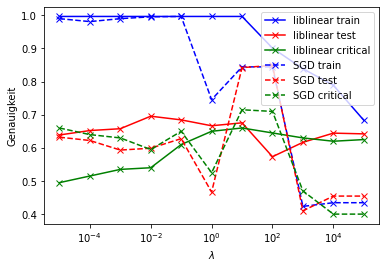

In [3]:
from sklearn import linear_model
from sklearn.neural_network import MLPClassifier

# define regularisation parameter
lmbdas=np.logspace(-5,5,11)

# preallocate data
train_accuracy=np.zeros(lmbdas.shape,np.float64)
test_accuracy=np.zeros(lmbdas.shape,np.float64)
critical_accuracy=np.zeros(lmbdas.shape,np.float64)

train_accuracy_SGD=np.zeros(lmbdas.shape,np.float64)
test_accuracy_SGD=np.zeros(lmbdas.shape,np.float64)
critical_accuracy_SGD=np.zeros(lmbdas.shape,np.float64)
 
for i,lmbda in enumerate(lmbdas):
    
    print('Modell \t train \t test \t critical')

    # Logistischer Regressor
    logreg=linear_model.LogisticRegression(C=1.0/lmbda,verbose=0,max_iter=1E3,tol=1E-5,
                                           solver='liblinear')

    # Fitten 
    logreg.fit(X_train, Y_train)

    # Testen der Vorhersage-Genauigkeit
    train_accuracy[i]=logreg.score(X_train,Y_train)
    test_accuracy[i]=logreg.score(X_test,Y_test)
    critical_accuracy[i]=logreg.score(X_critical,Y_critical)
    
    
    print('liblin \t %0.4f \t %0.4f \t %0.4f' %(train_accuracy[i],test_accuracy[i],critical_accuracy[i]) )

    # SGD-basierter logistischer Regressor
    logreg_SGD = linear_model.SGDClassifier(loss='log', penalty='l2', alpha=lmbda, max_iter=100, 
                                           shuffle=True, learning_rate='optimal')

    # Fitten
    logreg_SGD.fit(X_train,Y_train)

    # Testen der Vorhersage-Genauigkeit
    train_accuracy_SGD[i]=logreg_SGD.score(X_train,Y_train)
    test_accuracy_SGD[i]=logreg_SGD.score(X_test,Y_test)
    critical_accuracy_SGD[i]=logreg_SGD.score(X_critical,Y_critical)
    
    print('SGD \t  %0.4f \t %0.4f \t %0.4f' %(train_accuracy_SGD[i],test_accuracy_SGD[i],critical_accuracy_SGD[i]) )

    print('%i/11 Iterationen berechnet' %(i+1))

# Plot der Vorhersage-Genauigkeit über der Regularisierung
plt.semilogx(lmbdas,train_accuracy,'x-b',label='liblinear train')
plt.semilogx(lmbdas,test_accuracy,'x-r',label='liblinear test')
plt.semilogx(lmbdas,critical_accuracy,'x-g',label='liblinear critical')

plt.semilogx(lmbdas,train_accuracy_SGD,'x--b',label='SGD train')
plt.semilogx(lmbdas,test_accuracy_SGD,'x--r',label='SGD test')
plt.semilogx(lmbdas,critical_accuracy_SGD,'x--g',label='SGD critical')

plt.xlabel('$\\lambda$')
plt.ylabel('Genauigkeit')

plt.legend()
plt.savefig('machine-learing.png', dpi = 1000)

plt.show()

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


1/11 Iterationen berechnet


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


2/11 Iterationen berechnet


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


3/11 Iterationen berechnet


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


4/11 Iterationen berechnet


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


5/11 Iterationen berechnet


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


6/11 Iterationen berechnet


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


7/11 Iterationen berechnet


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


8/11 Iterationen berechnet
9/11 Iterationen berechnet
10/11 Iterationen berechnet
11/11 Iterationen berechnet


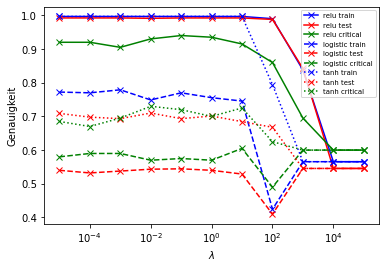

In [4]:
from sklearn.neural_network import MLPClassifier

# define regularisation parameter
lmbdas=np.logspace(-5,5,11)

# preallocate data
train_accuracy_clf_relu=np.zeros(lmbdas.shape,np.float64)
test_accuracy_clf_relu=np.zeros(lmbdas.shape,np.float64)
critical_accuracy_clf_relu=np.zeros(lmbdas.shape,np.float64)

train_accuracy_clf_logistic=np.zeros(lmbdas.shape,np.float64)
test_accuracy_clf_logistic=np.zeros(lmbdas.shape,np.float64)
critical_accuracy_clf_logistic=np.zeros(lmbdas.shape,np.float64)

train_accuracy_clf_tanh=np.zeros(lmbdas.shape,np.float64)
test_accuracy_clf_tanh=np.zeros(lmbdas.shape,np.float64)
critical_accuracy_clf_tanh=np.zeros(lmbdas.shape,np.float64)

for i,lmbda in enumerate(lmbdas):
    
    # SGD-Netzwerk mit einer ReLu als Aktivierungsfunktion
    clf_relu = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='sgd', alpha=lmbda, learning_rate='constant', tol=1e-4, max_iter=200, early_stopping=False)
    
    clf_relu.fit(X_train, Y_train)
    train_accuracy_clf_relu[i] = clf_relu.score(X_train, Y_train)
    test_accuracy_clf_relu[i] = clf_relu.score(X_test, Y_test)
    critical_accuracy_clf_relu[i] = clf_relu.score(X_critical, Y_critical)
    
    # SGD-Netzwerk mit einer Sigmoide als Aktivierungsfunktion
    clf_logistic = MLPClassifier(hidden_layer_sizes=(100,), activation='logistic', solver='sgd', alpha=lmbda, learning_rate='constant', tol=1e-4, max_iter=200)
    
    clf_logistic.fit(X_train, Y_train)
    train_accuracy_clf_logistic[i] = clf_logistic.score(X_train, Y_train)
    test_accuracy_clf_logistic[i] = clf_logistic.score(X_test, Y_test)
    critical_accuracy_clf_logistic[i] = clf_logistic.score(X_critical, Y_critical)
    
    # SGD-Netzwerk mit einem tanh als Aktivierungsfunktion
    clf_tanh = MLPClassifier(hidden_layer_sizes=(100,), activation='tanh', solver='sgd', alpha=lmbda, learning_rate='constant', tol=1e-4, max_iter=200, early_stopping=False)
    
    clf_tanh.fit(X_train, Y_train)
    train_accuracy_clf_tanh[i] = clf_tanh.score(X_train, Y_train)
    test_accuracy_clf_tanh[i] = clf_tanh.score(X_test, Y_test)
    critical_accuracy_clf_tanh[i] = clf_tanh.score(X_critical, Y_critical)
    
    print('%i/11 Iterationen berechnet' %(i+1))
    
# Plot der Vorhersage-Genauigkeit über der Regularisierung
plt.clf
plt.semilogx(lmbdas,train_accuracy_clf_relu,'x-b',label='relu train')
plt.semilogx(lmbdas,test_accuracy_clf_relu,'x-r',label='relu test')
plt.semilogx(lmbdas,critical_accuracy_clf_relu,'x-g',label='relu critical')

plt.semilogx(lmbdas,train_accuracy_clf_logistic,'x--b',label='logistic train')
plt.semilogx(lmbdas,test_accuracy_clf_logistic,'x--r',label='logistic test')
plt.semilogx(lmbdas,critical_accuracy_clf_logistic,'x--g',label='logistic critical')

plt.semilogx(lmbdas,train_accuracy_clf_tanh,'x:b',label='tanh train')
plt.semilogx(lmbdas,test_accuracy_clf_tanh,'x:r',label='tanh test')
plt.semilogx(lmbdas,critical_accuracy_clf_tanh,'x:g',label='tanh critical')

plt.xlabel('$\\lambda$')
plt.ylabel('Genauigkeit')

plt.legend(loc='upper right', fontsize='x-small')
plt.savefig('machine-learing_neural_net.png', dpi = 1000)

plt.show()